# EDA: Fatalities in the Israeli-Palestinian 2000-2023





The Israeli-Palestinian conflict has been a long-standing and deeply complex issue, marked by recurrent violence and loss of life. To shed light on the human toll and identify patterns, it is essential to conduct an in-depth exploratory data analysis of fatalities in this conflict. This analysis aims to answer critical questions, such as understanding the distribution of fatalities over time, the demographics of those affected, and the potential impact of conflict-related variables. By addressing these issues, we can gain valuable insights into the nature of this protracted conflict, which may contribute to informed discussions and peace-building efforts in the region.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab data/Pal.csv')

In [ ]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [ ]:
df.tail()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.
11123,Wichlav Zalsevsky,2000-10-02,24.0,Israeli,Masha,Salfit,West Bank,2000-10-02,M,Israelis,Ashdod,Israel,gunfire,live ammunition,Palestinian civilians,NaN


In [ ]:
df.shape

(11124, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [ ]:
df.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [ ]:
df.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

In [ ]:
col_to_null_drop=['age','gender','place_of_residence','place_of_residence_district','type_of_injury']
df.dropna(subset=col_to_null_drop, inplace=True)

In [ ]:
fill_val={'took_part_in_the_hostilities':'Unknown','ammunition':'Unknown'}
df.fillna(fill_val, inplace= True)

In [ ]:
col_to_drop=['name','notes','date_of_death']
df=df.drop(columns=col_to_drop, axis=1)

In [ ]:
df.isnull().any()

date_of_event                   False
age                             False
citizenship                     False
event_location                  False
event_location_district         False
event_location_region           False
gender                          False
took_part_in_the_hostilities    False
place_of_residence              False
place_of_residence_district     False
type_of_injury                  False
ammunition                      False
killed_by                       False
dtype: bool

In [ ]:
df.head()

,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by
0,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,M,Unknown,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces
1,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,M,Unknown,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces
2,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,M,Unknown,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces
3,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,M,Unknown,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces
4,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,M,Unknown,Jenin,Jenin,gunfire,live ammunition,Israeli security forces


Basics

In [ ]:
df['citizenship'].value_counts()

Palestinian    9681
Israeli         986
Jordanian         2
American          1
Name: citizenship, dtype: int64

<Axes: xlabel='citizenship', ylabel='count'>

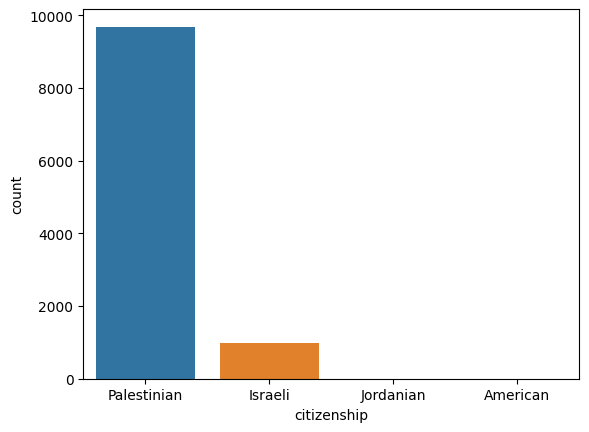

In [ ]:
sns.countplot(data=df,x='citizenship')


<Axes: xlabel='gender', ylabel='citizenship'>

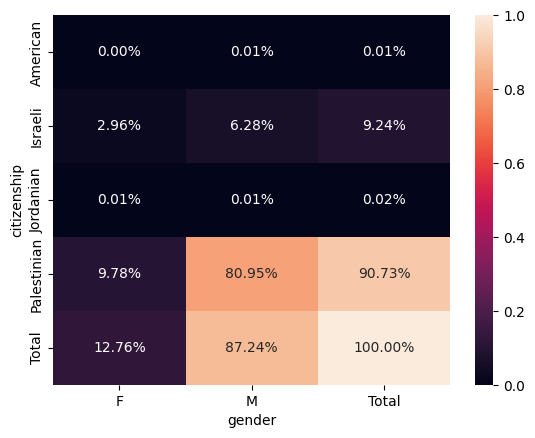

In [ ]:

sns.heatmap(pd.crosstab(index=df['citizenship'],columns=df['gender'],margins=True, margins_name="Total", normalize='all'),annot=True, cbar=True, fmt=".2%",)

In [ ]:
pal=df[(df['citizenship']=='Palestinian')]
pal.describe()

,age
count,9681.000000
mean,25.767483
std,12.794262
min,1.000000
25%,19.000000
50%,23.000000
75%,30.000000
max,112.000000


In [ ]:
pal.skew(numeric_only=True)

age    1.425295
dtype: float64

<Axes: ylabel='Count'>

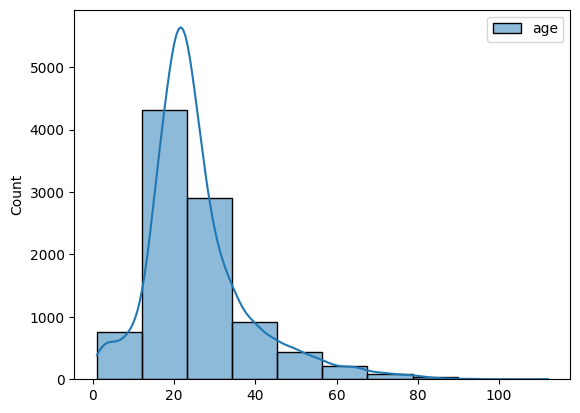

In [ ]:
sns.histplot(pal,kde=True, bins=10)

In [ ]:
interval = (0,18, 28, 40, 110)

cats = ['child', 'Young', 'Adult', 'Senior']
df["age_label"] = pd.cut(df.age, interval, labels=cats)

In [ ]:
interval = (0,18, 28, 40, 110)

cats = ['child', 'Young', 'Adult', 'Senior']
pal["age_label"] = pd.cut(pal.age, interval, labels=cats)

<ipython-input-40-2eb8035c5017>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pal['age_label'].value_counts()

Young     4513
child     2419
Adult     1652
Senior    1096
Name: age_label, dtype: int64

In [ ]:
fig = px.box(pal, x='age_label', y='age',color='age_label')
fig.update_layout(
    width=600,
    height=600,
)
fig.show()



Killed By

In [ ]:
df['killed_by'].value_counts()

Israeli security forces    9595
Palestinian civilians       985
Israeli civilians            90
Name: killed_by, dtype: int64

<Axes: xlabel='killed_by', ylabel='count'>

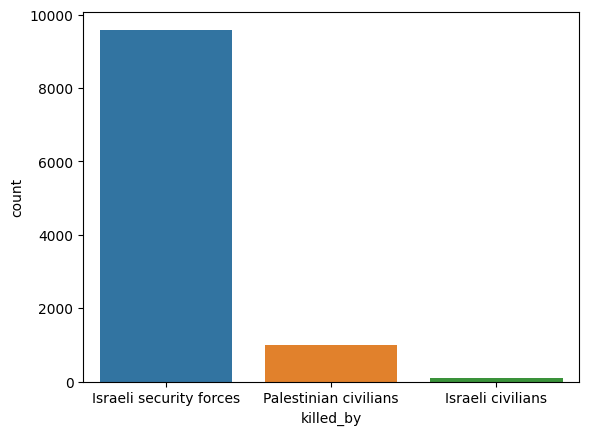

In [ ]:
sns.countplot(data=df, x='killed_by')

In [ ]:
cross=pd.crosstab(index=df['killed_by'],columns=df['gender'])

In [ ]:
cross

gender,F,M
killed_by,,
Israeli civilians,4,86
Israeli security forces,1041,8554
Palestinian civilians,316,669


Type of Ammunation used

In [ ]:
palx=pal[(pal['ammunition']!='Unknown')]

In [ ]:
paly=pal[(pal['took_part_in_the_hostilities']!='Unknown')]

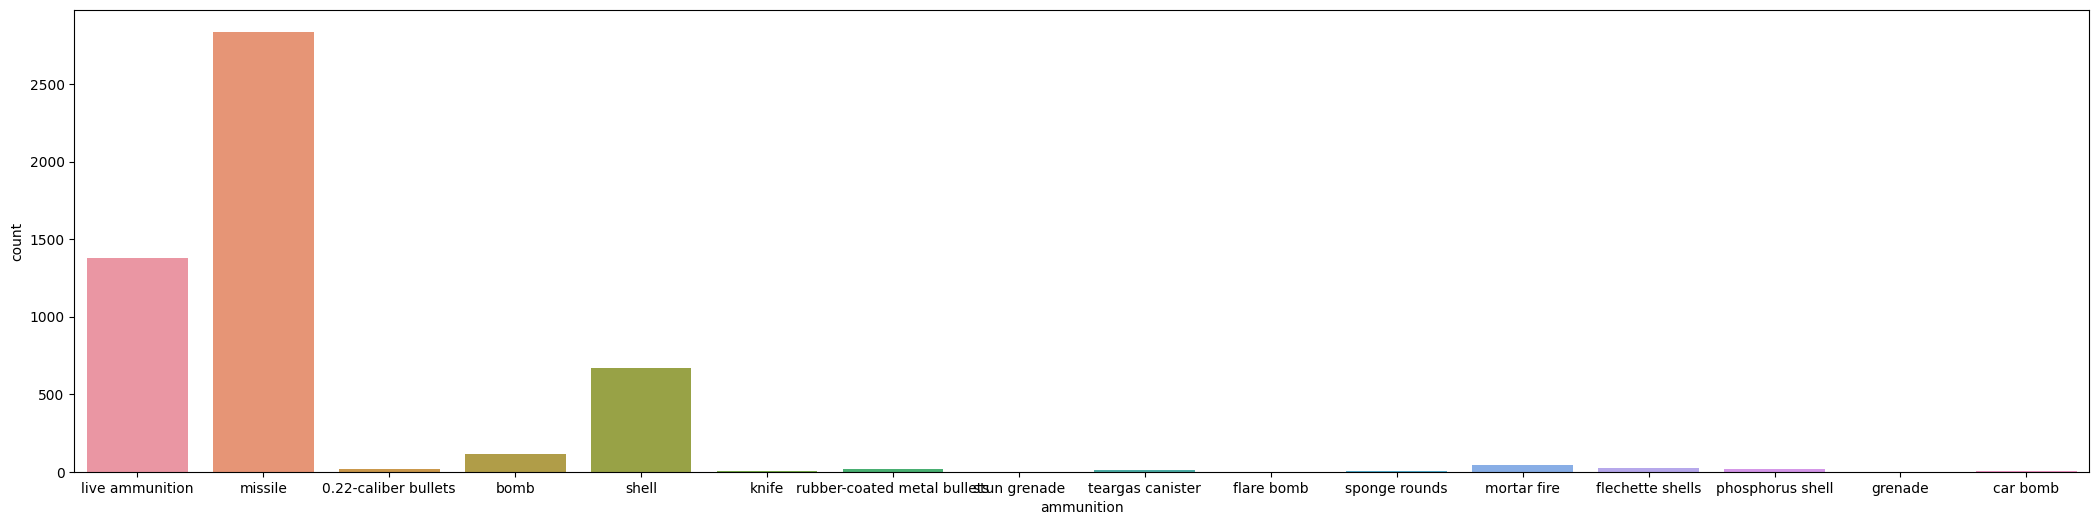

In [ ]:
plt.figure(figsize=(26, 6))

sns.countplot(data=palx,x='ammunition')
plt.show()

<Axes: xlabel='age_label', ylabel='ammunition'>

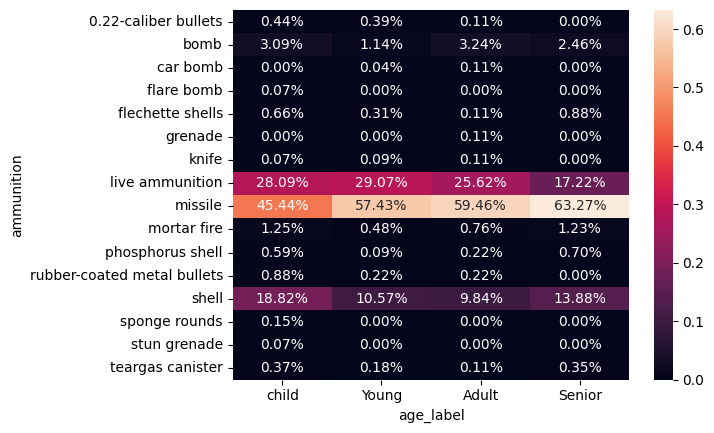

In [ ]:
sns.heatmap(pd.crosstab(index=palx['ammunition'],columns=palx['age_label'], normalize='columns'),annot=True, cbar=True, fmt=".2%",)

People who Join in conflict

<Axes: xlabel='age_label', ylabel='took_part_in_the_hostilities'>

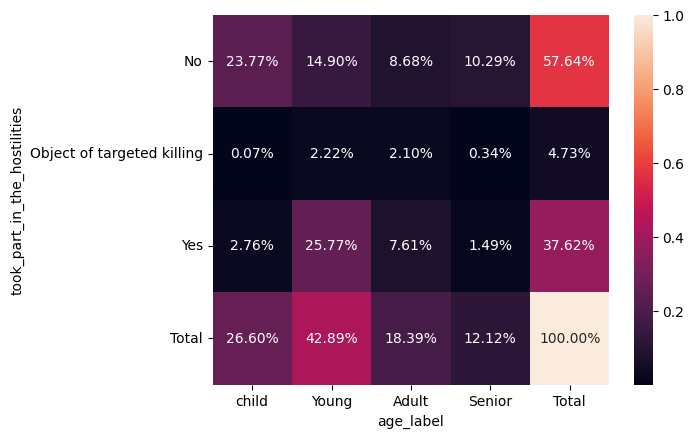

In [ ]:
sns.heatmap(pd.crosstab(index=paly['took_part_in_the_hostilities'],columns=palx['age_label'],margins=True, margins_name="Total", normalize='all'),annot=True, cbar=True, fmt=".2%",)

In [ ]:
palz=pal[(pal['took_part_in_the_hostilities']!='No')]

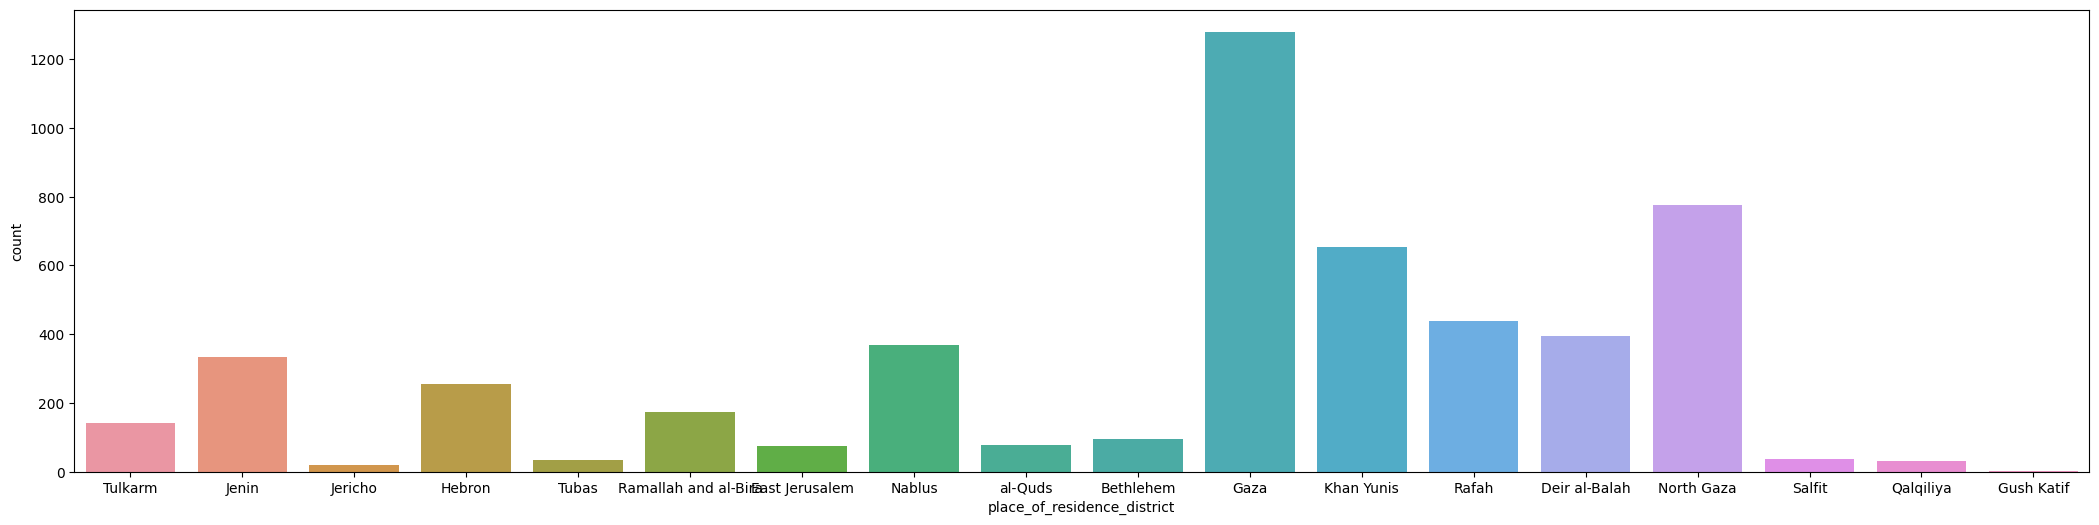

In [ ]:
plt.figure(figsize=(26, 6))

sns.countplot(data=palz,x='place_of_residence_district')
plt.show()

Event history

<Axes: xlabel='event_location_region', ylabel='count'>

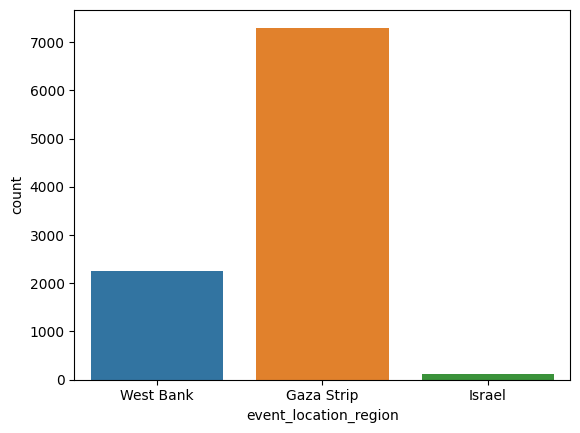

In [ ]:
sns.countplot(data=pal,x='event_location_region')

In [ ]:
pd.crosstab(pal['event_location_region'],pal['event_location_district'],margins=True, margins_name="Total")

event_location_district,Bethlehem,Deir al-Balah,East Jerusalem,Gaza,Gush Katif,Hebron,Israel,Jenin,Jericho,Khan Yunis,Nablus,North Gaza,Qalqiliya,Rafah,Ramallah and al-Bira,Salfit,Tubas,Tulkarm,al-Quds,Total
event_location_region,,,,,,,,,,,,,,,,,,,,
Gaza Strip,0,813,0,2299,47,0,0,0,0,1336,0,1789,0,1019,0,0,0,0,0,7303
Israel,0,0,0,0,0,0,118,0,0,0,0,0,0,0,0,0,0,0,0,118
West Bank,156,0,84,0,0,293,0,444,35,0,541,0,58,0,289,33,47,197,83,2260
Total,156,813,84,2299,47,293,118,444,35,1336,541,1789,58,1019,289,33,47,197,83,9681


In [ ]:
pd.crosstab(pal['event_location_district'],pal['ammunition'],margins=True, margins_name="Total",)

ammunition,0.22-caliber bullets,Unknown,bomb,car bomb,flare bomb,flechette shells,grenade,knife,live ammunition,missile,mortar fire,phosphorus shell,rubber-coated metal bullets,shell,sponge rounds,stun grenade,teargas canister,Total
event_location_district,,,,,,,,,,,,,,,,,,
Bethlehem,3,89,4,0,0,0,0,0,58,1,0,0,1,0,0,0,0,156
Deir al-Balah,0,436,12,0,1,1,0,0,67,245,0,0,0,48,0,0,3,813
East Jerusalem,0,7,0,0,0,0,0,0,73,2,0,0,0,0,1,0,1,84
Gaza,0,902,24,0,0,5,0,0,97,1096,5,4,0,165,0,1,0,2299
Gush Katif,0,41,0,0,0,1,0,0,1,2,0,0,0,2,0,0,0,47
Hebron,6,124,0,0,0,0,0,0,139,15,0,0,1,7,0,0,1,293
Israel,0,75,0,0,0,0,0,3,37,1,0,0,0,2,0,0,0,118
Jenin,1,238,4,0,0,0,1,0,175,18,0,0,0,7,0,0,0,444
Jericho,1,13,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,35


Palastinean Death by Year

In [ ]:
pal['date_of_event'] = pd.to_datetime(pal['date_of_event'])

<ipython-input-79-8850df7eaba6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fatality_by_year = pal.groupby(pal['date_of_event'].dt.year).size()

In [ ]:
fig = px.line(fatality_by_year,
              title='Fatality Trends from 2000 to 2023 ',
              labels={'date_of_event': 'Year', 'fatalities': 'Number of Fatalities'},
              markers=True)
fig.show()

Isrilei Death by year

In [ ]:
pals=df[(df['citizenship']=='Israeli')]

In [ ]:
pals['date_of_event'] = pd.to_datetime(pals['date_of_event'])

<ipython-input-85-0c6fda54d253>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fatality_by_year = pals.groupby(pals['date_of_event'].dt.year).size()

In [ ]:
fig = px.line(fatality_by_year,
              title='Fatality Trends from 2000 to 2023 for Isrile',
              labels={'date_of_event': 'Year', 'fatalities': 'Number of Fatalities'},
              markers=True)
fig.show()